# mRNA Construct Plotting — Demo

This notebook demonstrates the two plotting functions in `plot_secondary_structure.py`:

| Function | What it shows |
|---|---|
| `plot_mrna_construct` | **1-D linear map** — domains (5′UTR, CDS, 3′UTR), sponge sites labelled by miRNA name |
| `predict_and_plot_full_and_utrs` | **2-D secondary structure** — ViennaRNA NAView fold of full transcript + individual UTRs |

We use the **Oct4 / POU5F1** canonical transcript as the example.

In [1]:
import sys, os

# Ensure the dashboard directory is on the path
sys.path.insert(0, os.path.abspath(os.path.dirname("__file__")))

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 120

from plot_secondary_structure import (
    generate_mrna_sponge_utr,
    plot_mrna_construct,
    predict_and_plot_full_and_utrs,
)

## 1. Define sequences

All sequences are **RNA** (A/U/G/C). DNA inputs are converted with `T → U`.

In [2]:
# Oct4 / POU5F1 canonical transcript components
UTR5 = (
    "GAGTAGTCCCTTCGCAAGCCCTCATTTCACCAGGCCCCCGGCTTGGGGCGCCTTCCTTCCCC"
    .replace("T", "U")
)

CDS = (
    "ATGGCGGGACACCTGGCTTCGGATTTCGCCTTCTCGCCCCCTCCAGGTGGTGGAGGTGATGG"
    "GCCAGGGGGGCCGGAGCCGGGCTGGGTTGATCCTCGGACCTGGCTAAGCTTCCAAGGCCCTC"
    "CTGGAGGGCCAGGAATCGGGCCGGGGGTTGGGCCAGGCTCTGAGGTGTGGGGGATTCCCCCA"
    "TGCCCCCCGCCGTATGAGTTCTGTGGGGGGATGGCGTACTGTGGGCCCCAGGTTGGAGTGGG"
    "GCTAGTGCCCCAAGGCGGCTTGGAGACCTCTCAGCCTGAGGGCGAAGCAGGAGTCGGGGTGG"
    "AGAGCAACTCCGATGGGGCCTCCCCGGAGCCCTGCACCGTCACCCCTGGTGCCGTGAAGCTG"
    "GAGAAGGAGAAGCTGGAGCAAAACCCGGAGGAGTCCCAGGACATCAAAGCTCTGCAGAAAGAA"
    "CTCGAGCAATTTGCCAAGCTCCTGAAGCAGAAGAGGATCACCCTGGGATATACACAGGCCGAT"
    "GTGGGGCTCACCCTGGGGGTTCTATTTGGGAAGGTATTCAGCCAAACGACCATCTGCCGCTTT"
    "GAGGCTCTGCAGCTTAGCTTCAAGAACATGTGTAAGCTGCGGCCCTTGCTGCAGAAGTGGGTG"
    "GAGGAAGCTGACAACAATGAAAATCTTCAGGAGATATGCAAAGCAGAAACCCTCGTGCAGGCC"
    "CGAAAGAGAAAGCGAACCAGTATCGAGAACCGAGTGAGAGGCAACCTGGAGAATTTGTTCCTG"
    "CAGTGCCCGAAACCCACACTGCAGCAGATCAGCCACATCGCCCAGCAGCTTGGGCTCGAGAAG"
    "GATGTGGTCCGAGTGTGGTTCTGTAACCGGCGCCAGAAGGGCAAGCGATCAAGCAGCGACTAT"
    "GCACAACGAGAGGATTTTGAGGCTGCTGGGTCTCCTTTCTCAGGGGGACCAGTGTCCTTTCCTC"
    "TGGCCCCAGGGCCCCATTTTGGTACCCCAGGCTATGGGAGCCCTCACTTCACTGCACTGTACTC"
    "CTCGGTCCCTTTCCCTGAGGGGGAAGCCTTTCCCCCTGTCTCCGTCACCACTCTGGGCTCTCCC"
    "ATGCATTCAAACTGA"
).replace("T", "U")

print(f"5′UTR: {len(UTR5)} nt")
print(f"CDS:   {len(CDS)} nt")

5′UTR: 62 nt
CDS:   1083 nt


## 2. Generate a 3′UTR sponge cassette

We target **two miRNAs** and build **16 sponge sites** cycling through them.

In [3]:
# Target miRNAs (RNA sequences)
MIRNA_SEQS = [
    "AACGCCAUUAUCACACUAAAUA",   # miR-122-3p
    "UAGCUUAUCAGACUGAUGUUGA",  # miR-21-5p
]
MIRNA_NAMES = ["miR-122-3p", "miR-21-5p"]

# Build the 3′UTR
UTR3_SPONGE = generate_mrna_sponge_utr(MIRNA_SEQS, num_sites=16)
print(f"3′UTR sponge length: {len(UTR3_SPONGE)} nt")
print(f"First 120 nt: {UTR3_SPONGE[:120]}...")

3′UTR sponge length: 688 nt
First 120 nt: UAAgcauacUAUUUAGUGUUCGCAUGGCGUUaauuUCAACAUCAGGAGUAUAAGCUAucgaUAUUUAGUGUUCGCAUGGCGUUcaagUCAACAUCAGGAGUAUAAGCUAauacUAUUUAG...


## 3. 1-D linear transcript map

Shows domain boundaries (5′UTR → CDS → 3′UTR) and labels every sponge site with its miRNA name.

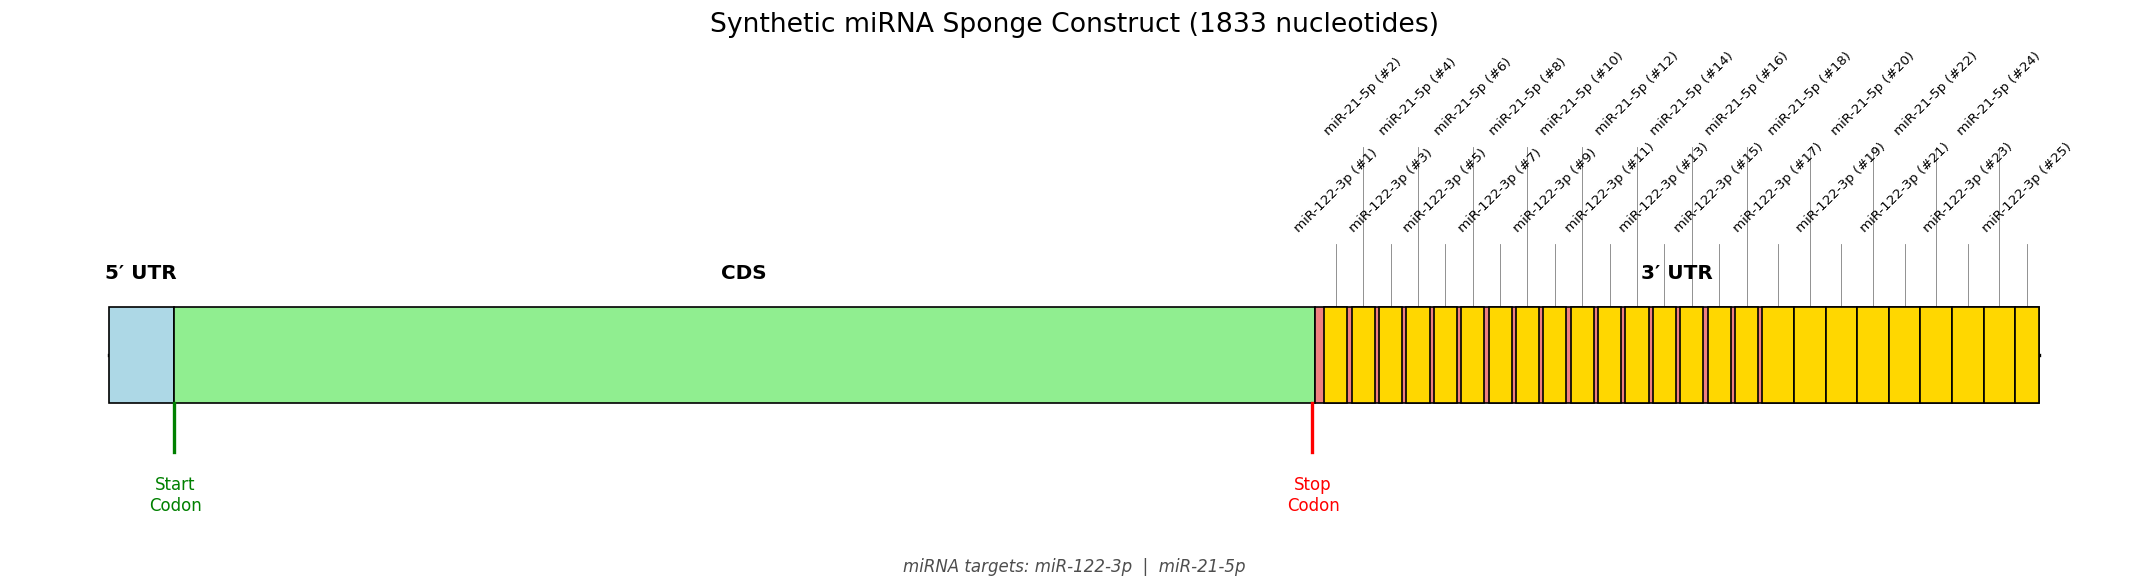

In [ ]:
fig = plot_mrna_construct(
    seq_5utr=UTR5,
    seq_cds=CDS,
    seq_3utr=UTR3_SPONGE,
    mirna_names=MIRNA_NAMES,
    base_prefix="Oct4_demo",
    show=True,
)

## 4. 2-D secondary-structure plots

Folds the full transcript + each UTR individually with ViennaRNA at 37 °C and renders the NAView layout.

For the 2-D plot we use a shorter **natural 3′UTR** so the fold is tractable and visually clear.

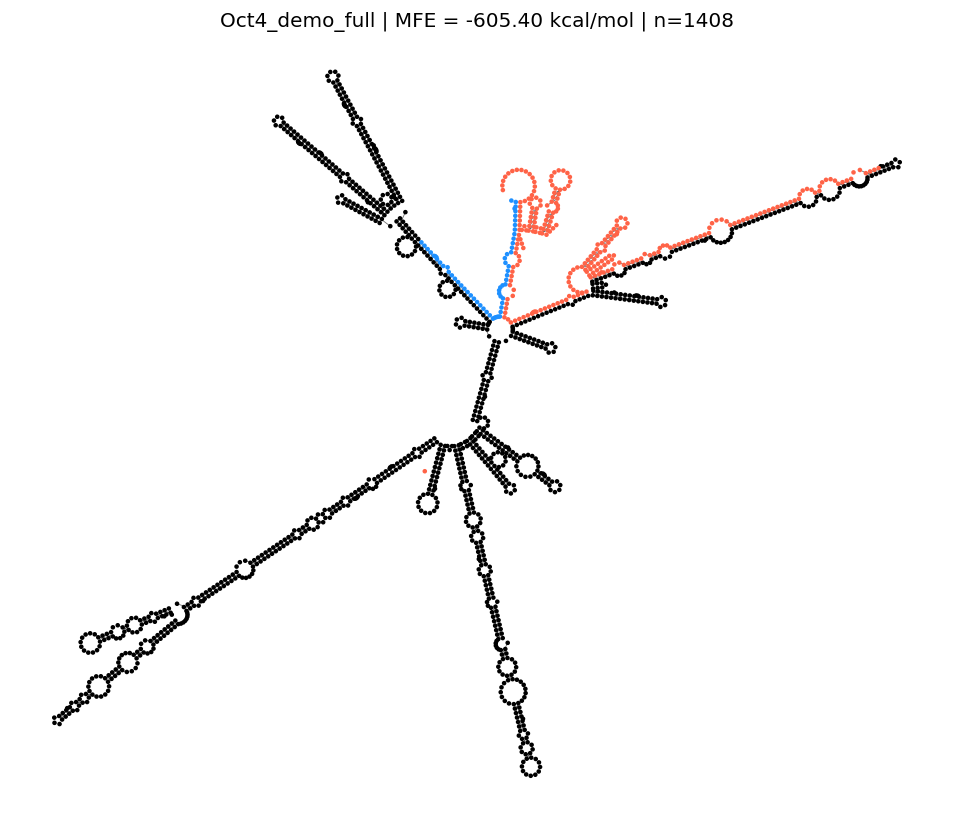

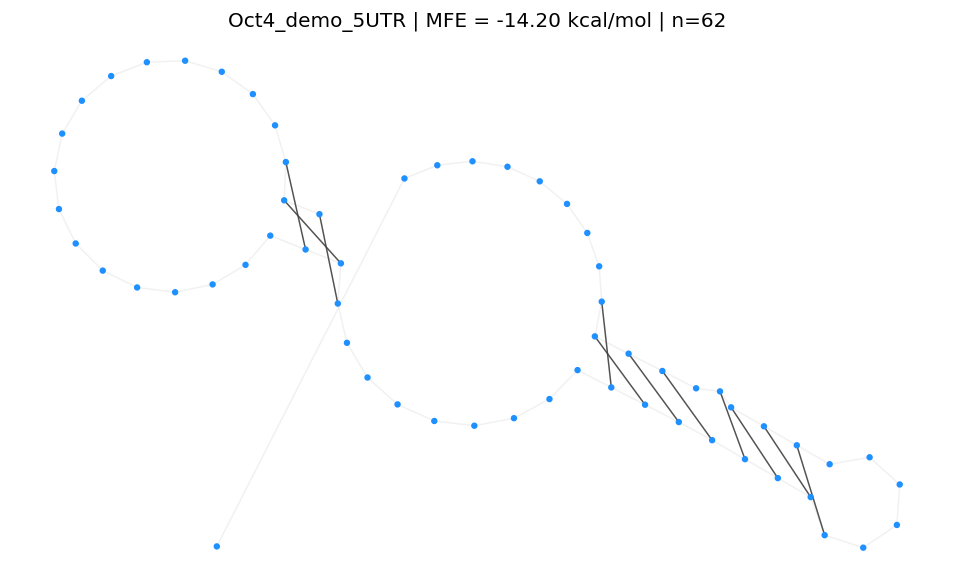

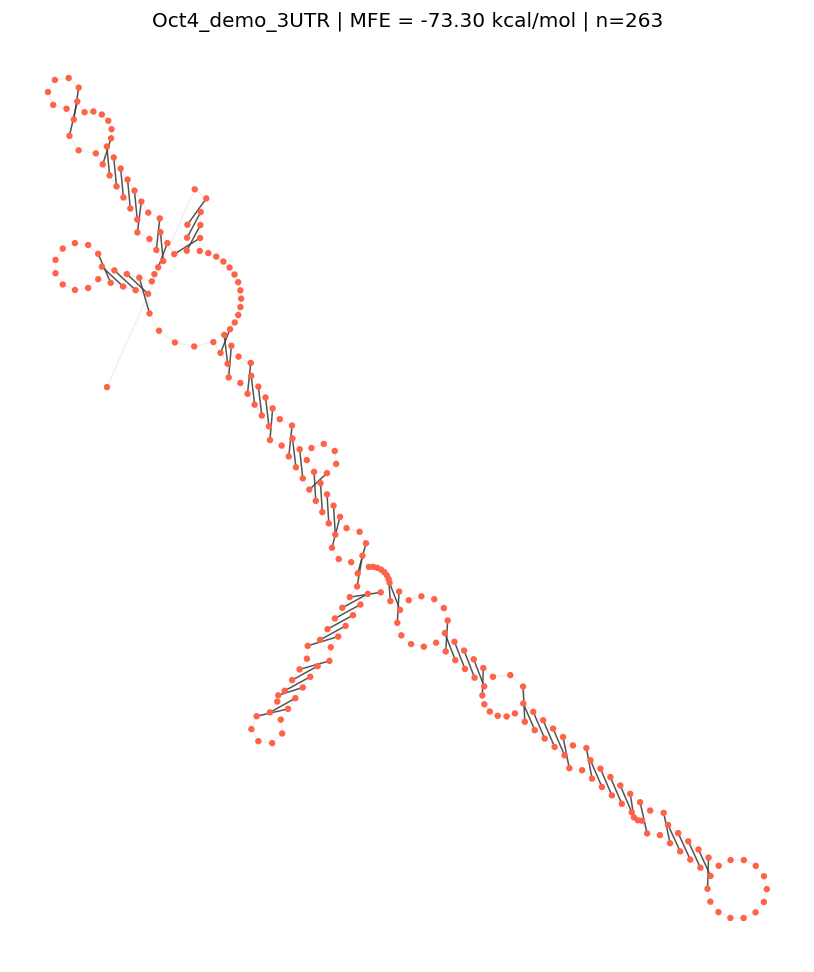


Full transcript MFE: -605.40 kcal/mol
5′UTR MFE:           -14.20 kcal/mol
3′UTR MFE:           -73.30 kcal/mol


In [5]:
# Natural Oct4 3′UTR (shorter, for tractable folding)
UTR3_NATURAL = (
    "GGTGCCTGCCCTTCTAGGAATGGGGGACAGGGGGAGGGGAGGAGCTAGGGAAAGAAAACCTG"
    "GAGTTTGTGCCAGGGTTTTTGGGATTAAGTTCTTCATTCACTAAGGAAGGAATTGGGAACAC"
    "AAAGGGTGGGGGCAGGGGAGTTTGGGGCAACTGGTTGGAGGGAAGGTGAAGTTCAATGATGC"
    "TCTTGATTTTAATCCCACATCATGTATCACTTTTTTCTTAAATAAAGAAGCCTGGGACACAGT"
    "AGAAGACACACTTA"
)

results = predict_and_plot_full_and_utrs(
    utr5=UTR5,
    cds=CDS,
    utr3=UTR3_NATURAL,
    out_dir="plots",
    base_prefix="Oct4_demo",
    show=True,
)

print(f"\nFull transcript MFE: {results['full']['mfe']:.2f} kcal/mol")
print(f"5′UTR MFE:           {results['utr5']['mfe']:.2f} kcal/mol")
print(f"3′UTR MFE:           {results['utr3']['mfe']:.2f} kcal/mol")

## 5. Saved files

The 2-D plots are also saved as PNG + SVG in `plots/`.

In [ ]:
for region in ("full", "utr5", "utr3"):
    for fmt, path in results[region]["files"].items():
        print(f"{region:5s} [{fmt}] → {path}")